In [1]:
#importing libraries
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import svm
from sklearn import linear_model, dummy, metrics
from sklearn.dummy import DummyClassifier
from sklearn.metrics import *
import time
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"training.csv", decimal = ',') #importing file while converting commas to decimal
df.head(5)

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,a,17.92,"5,4e-05",u,g,c,v,1.75,f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,16.92,"3,35e-05",y,p,k,v,0.29,f,f,0,f,s,200.0,0,2000000.0,NaN,0,no.
2,b,31.25,1125,u,g,ff,ff,0.00,f,t,1,f,g,96.0,19,960000.0,t,0,no.
3,a,48.17,1335,u,g,i,o,335.00,f,f,0,f,g,0.0,120,0.0,NaN,0,no.
4,b,32.33,35,u,g,k,v,0.50,f,f,0,t,g,232.0,0,2320000.0,f,0,no.


In [3]:
df.dtypes

variable1      object
variable2     float64
variable3      object
variable4      object
variable5      object
variable6      object
variable7      object
variable8     float64
variable9      object
variable10     object
variable11      int64
variable12     object
variable13     object
variable14    float64
variable15      int64
variable17    float64
variable18     object
variable19      int64
classLabel     object
dtype: object

In [4]:
#Cleaning variable3 to convert it into numeric data type (Along with replacing comma with decimal)
df.variable3 = df.variable3.replace(',','.', regex=True)
df['variable3'] = df['variable3'].apply(pd.to_numeric,errors='coerce')

In [5]:
df.count(axis = 0)

variable1     3661
variable2     3661
variable3     3700
variable4     3636
variable5     3636
variable6     3634
variable7     3634
variable8     3700
variable9     3700
variable10    3700
variable11    3700
variable12    3700
variable13    3700
variable14    3600
variable15    3700
variable17    3600
variable18    1555
variable19    3700
classLabel    3700
dtype: int64

Variable18 has 60% of entries missing, so this variable might not help us in the model. We'll remove this column

In [6]:
del df['variable18'] 
#Lets also clean data by removing NAs
df = df.dropna()

In [7]:
df.isna().sum()

variable1     0
variable2     0
variable3     0
variable4     0
variable5     0
variable6     0
variable7     0
variable8     0
variable9     0
variable10    0
variable11    0
variable12    0
variable13    0
variable14    0
variable15    0
variable17    0
variable19    0
classLabel    0
dtype: int64

In [8]:
df.describe()

,variable2,variable3,variable8,variable11,variable14,variable15,variable17,variable19
count,3522.000000,3522.000000,3522.000000,3522.000000,3522.000000,3522.000000,3.522000e+03,3522.000000
mean,32.879997,1258.849023,684.412010,4.291880,162.457127,2217.746451,1.624571e+06,0.926746
std,12.494864,3228.983729,1990.845399,6.876811,155.809054,8762.072131,1.558091e+06,0.260590
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,22.920000,0.000300,1.460000,0.000000,0.000000,0.000000,0.000000e+00,1.000000
50%,28.750000,55.000000,4.250000,2.000000,120.000000,134.000000,1.200000e+06,1.000000
75%,41.000000,504.000000,125.000000,6.000000,280.000000,1065.000000,2.800000e+06,1.000000
max,73.420000,26335.000000,14415.000000,67.000000,980.000000,100000.000000,9.800000e+06,1.000000


#### Few points to be noted
1. This shows that variable3, 8, and 15 has a very high stdev (roughly more than 3 times than average). And since we dont know the specificities of these variables, it is better to remove them from our input data.
2. Also variable 14 and 17 are same. (Variable 17 = Variable14 x 10000). So it is a better option to remove variable17.

In [9]:
df = df.drop(columns=['variable3', 'variable8','variable15', 'variable17']) #Removing beacause of very large st dev
#Lets explore categorical variable
categorical_columns = ['variable1','variable4', 'variable5', 'variable6', 'variable7','variable9','variable10','variable12','variable13','classLabel']
for col in categorical_columns:
    print(np.unique(df[col])) 

['a' 'b']
['l' 'u' 'y']
['g' 'gg' 'p']
['W' 'aa' 'c' 'cc' 'd' 'e' 'ff' 'i' 'j' 'k' 'm' 'q' 'r' 'x']
['bb' 'dd' 'ff' 'h' 'j' 'n' 'o' 'v' 'z']
['f' 't']
['f' 't']
['f' 't']
['g' 'p' 's']
['no.' 'yes.']


In [10]:
pd.set_option('display.max_rows', None)
df.head(100)

,variable1,variable2,variable4,variable5,variable6,variable7,variable9,variable10,variable11,variable12,variable13,variable14,variable19,classLabel
0,a,17.92,u,g,c,v,f,t,1,t,g,80.0,0,no.
1,b,16.92,y,p,k,v,f,f,0,f,s,200.0,0,no.
2,b,31.25,u,g,ff,ff,f,t,1,f,g,96.0,0,no.
3,a,48.17,u,g,i,o,f,f,0,f,g,0.0,0,no.
4,b,32.33,u,g,k,v,f,f,0,t,g,232.0,0,no.
5,a,34.83,y,p,i,h,f,f,0,t,g,160.0,0,no.
6,a,26.17,u,g,j,j,f,f,0,t,g,276.0,0,no.
7,b,21.17,y,p,c,h,f,f,0,f,g,280.0,0,no.
8,b,28.92,u,g,c,v,f,f,0,f,g,220.0,0,no.
9,b,18.17,u,g,c,h,f,f,0,f,g,320.0,0,no.


### A few observations from above output:
1. For every classLabel 'no.' and 'yes.', variable19 is 1 and 0 respectively
2. For every '0' in variable11, variable10 = 't' & for every non-zero number in variable11, variable10 = 'f'

Lets explore to validate our hypothesis

In [11]:
df.groupby('classLabel')['variable19'].value_counts()


classLabel  variable19
no.         0              258
yes.        1             3264
Name: variable19, dtype: int64

Above table show that our initital hypothesis about variable19 is true.
Now there can be two cases. Either classLabel is variable19 or it is just a co-incidence in this data.
Eitherway we have to remove this column

In [12]:
df.groupby('variable10')['variable11'].value_counts()

variable10  variable11
f           0             1365
t           1              351
            3              244
            2              209
            11             193
            6              178
            5              177
            7              161
            4              130
            9               80
            12              80
            8               64
            15              64
            16              48
            10              34
            14              32
            13              16
            17              16
            19              16
            20              16
            23              16
            40              16
            67              16
Name: variable11, dtype: int64

Above table also shows that our variable10 is directly dependant on variable11. So it is better to remove variable10

In [13]:
df = df.drop(columns=['variable10','variable19'])  
#Now looking at data again
df.head(5)

,variable1,variable2,variable4,variable5,variable6,variable7,variable9,variable11,variable12,variable13,variable14,classLabel
0,a,17.92,u,g,c,v,f,1,t,g,80.0,no.
1,b,16.92,y,p,k,v,f,0,f,s,200.0,no.
2,b,31.25,u,g,ff,ff,f,1,f,g,96.0,no.
3,a,48.17,u,g,i,o,f,0,f,g,0.0,no.
4,b,32.33,u,g,k,v,f,0,t,g,232.0,no.


Lets make sense of this data now

# Observations

#### Data seems like indivodual level

#### Assuming that variable1 is gender, variable2 is age, and variable14 is monetary or quantity value (may be insurance cost/premium/salary in 10,000s/number of items)

#### Categorical variable4, 5, 6, 7, and 13 may indicate to some individual attributes or demographics
 
#### Variable whereas variables with t/f value may indicate some behaviors or charactereistics

#### This may indicate the data of people who purchased a certain insurance plan/ or did a certain transaction and 'classLabel' indicates if they were interested in some other product/service"

In [14]:
df['classLabel'].replace({'no.': 0, 'yes.': 1},inplace = True) #To convert it into int (binary)
df.shape

(3522, 12)

In [15]:
df.head(5)

,variable1,variable2,variable4,variable5,variable6,variable7,variable9,variable11,variable12,variable13,variable14,classLabel
0,a,17.92,u,g,c,v,f,1,t,g,80.0,0
1,b,16.92,y,p,k,v,f,0,f,s,200.0,0
2,b,31.25,u,g,ff,ff,f,1,f,g,96.0,0
3,a,48.17,u,g,i,o,f,0,f,g,0.0,0
4,b,32.33,u,g,k,v,f,0,t,g,232.0,0


In [16]:
#assuming that t means 'TRUE', and f indicates 'FALSE' in variable9, variable10, and variable12. t = 1, f = 0
df['variable9'].replace({'f': 0, 't': 1},inplace = True)
df['variable12'].replace({'f': 0, 't': 1},inplace = True)

#cleaning rest of non-numeric variables
categorical_columns = ['variable1','variable4', 'variable5', 'variable6', 'variable7', 'variable13']
# transform the categorical columns
df = pd.get_dummies(df, columns=categorical_columns)

#Using MinMaxScaler to standardize our data
scaler = preprocessing.MinMaxScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)

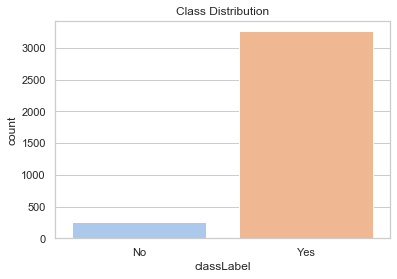

In [17]:
#To analyse occurances of yes and no in our class label
#set seaborn styling & color palette
sns.set(style="whitegrid")
sns.set_palette("pastel")

#Using a countplot to show the distribution of the classes: Yes OR NO
bp = sns.countplot(x=df["classLabel"])
plt.title("Class Distribution")
bp.set_xticklabels(["No","Yes"])
plt.show()

In [18]:
X = df.loc[:,df.columns!='classLabel']
y = df[['classLabel']]
selector = SelectKBest(chi2, k=3)
selector.fit(X, y)
X_new = selector.transform(X)
#print(X.columns[selector.get_support(indices=True)])

# Logistic Regression

In [19]:
t0=time.time()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

logisticRegr = LogisticRegression(random_state=1,solver='liblinear',fit_intercept=True)
#use logistic model to fit training data
logisticRegr.fit(X_train, y_train)
#generate predicted classes for test data
logis_pred = logisticRegr.predict(X_test)
#generate predicted probabilites for test data
logis_pred_prob = logisticRegr.predict_proba(X_test)
print('Time taken :' , time.time()-t0)

Time taken : 0.02212381362915039


C:\Users\Umar Habib\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
#The logistic model
print("Proportion of Transactions Predicted as Yes (Logistic Regression) = ", logis_pred.mean())
print("Test accuracy (Logistic Regression) =", logisticRegr.score(X_test,y_test), end="\n\n")

Proportion of Transactions Predicted as Yes (Logistic Regression) =  0.9477866061293984
Test accuracy (Logistic Regression) = 0.9489216799091941



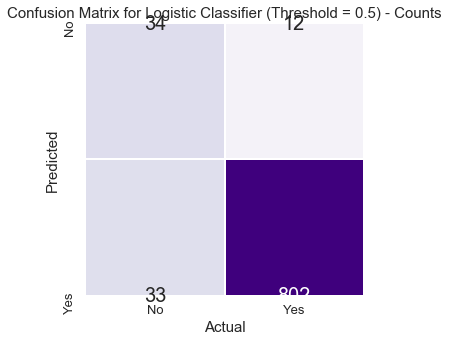

In [21]:
#Building Confusion matrix: Logistic - Thresh=0.5 - Counts

#generate confusion matrix
cm_logis = confusion_matrix(y_test, logis_pred)
#put it into a dataframe
cm_logis_df = pd.DataFrame(cm_logis)

#plot CM
fig, ax = plt.subplots(figsize = (5,5))
sns.heatmap(pd.DataFrame(cm_logis_df.T), annot=True, annot_kws={"size": 20}, cmap="Purples", vmin=0, vmax=150, fmt='.0f', linewidths=1, linecolor="white", cbar=False,
           xticklabels=["No","Yes"], yticklabels=["No","Yes"])
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(["No","Yes"], fontsize=13)
ax.set_yticklabels(["No","Yes"], fontsize=13)
plt.title("Confusion Matrix for Logistic Classifier (Threshold = 0.5) - Counts", fontsize=15)
plt.show()

In [22]:


#generating a report to extract the measure of interest using built-in sklearn function for Logistic Regression
report = classification_report(y_test,logis_pred,digits=3,output_dict = True)
#print(report)
print("LogReg Model:")
print("Accuracy = {0:0.3f}".format(report["accuracy"]))
print("Precision = {0:0.3f}".format(report["1.0"]["precision"]))
print("Specificity = {0:0.3f}".format(report["0.0"]["recall"]))
print("Sensitivity = {0:0.3f}".format(report["1.0"]["recall"]))
print("F1-score = {0:0.3f}".format(report["1.0"]["f1-score"]))

LogReg Model:
Accuracy = 0.949
Precision = 0.960
Specificity = 0.507
Sensitivity = 0.985
F1-score = 0.973


In [23]:
#Tradeoff between sensitivity & specificity in Logistic Regression
#creating new class predictions (from prediction probabilities) with a threshold of 0.6
pred_logis_1 = (logis_pred_prob[:,1] >= .6).astype(int)

#generating another report, this time for threshold = 0.1
report = classification_report(y_test,pred_logis_1,digits=3,output_dict = True)

print("Threshold probability of 0.6:")
print("Accuracy = {0:0.3f}".format(report["accuracy"]))
print("Precision = {0:0.3f}".format(report["1.0"]["precision"]))
print("Specificity = {0:0.3f}".format(report["0.0"]["recall"]))
print("Sensitivity = {0:0.3f}".format(report["1.0"]["recall"]))
print("F1-score = {0:0.3f}".format(report["1.0"]["f1-score"]))

Threshold probability of 0.6:
Accuracy = 0.953
Precision = 0.968
Specificity = 0.612
Sensitivity = 0.982
F1-score = 0.975


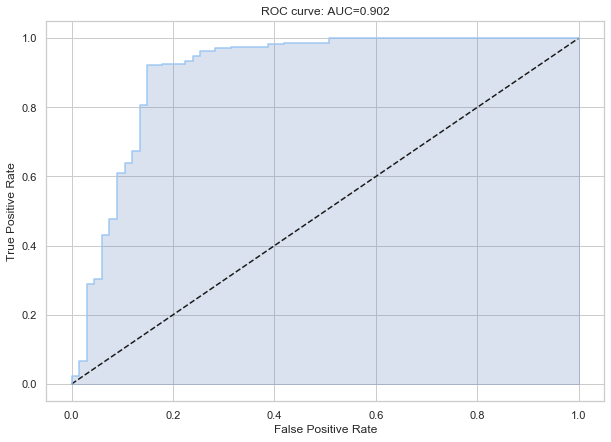

In [24]:
#Plotting the ROC curve

#Generating points to plot on ROC curve (logistic model)
fpr_logis, tpr_logis, thresholds_logis = roc_curve(y_test, logis_pred_prob[:,1])


fig, ax = plt.subplots(figsize = (10,7))
#plotting the "guessing" model
plt.plot([0, 1], [0, 1], 'k--')
#plotting the logistic model
plt.plot(fpr_logis, tpr_logis)
plt.fill_between(fpr_logis, tpr_logis, alpha=0.2, color='b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve: AUC={0:0.3f}'.format(roc_auc_score(y_test,logis_pred_prob[:,1])))
plt.show()

# Tradeoff b/w Sensitivity & Specificity

As evident through above ROC courve, there is a clear trade-off between Type-I error (false positive) and Type-II error (true negative). Higher the type I error, lower the specificity, and higher the type-II error, lower the sensitivity.
Assuming this is customer transactional data, where we want to segment a certain audience in order to target them for our marketing campaign, I believe Sensitivity should be our core performance matrix while also keeping it in mind that specificifity is also above 50% and accuracy, precision and f-value are also not compromised.
##### This means that we might get some non-interested customer profiles, but we will miss minimium profiles of those who are interested.
So, we decided to test some other ML models as below
Though I believe that Decision tree might be more appropriate given the number of categorical attributes in our data, but still we will try SVM as well

# Support Vector Machine

In [25]:
t0=time.time()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
clf_svc = svm.SVC(kernel='linear')
clf_svc.fit(X_train,y_train)
svm_pred = clf_svc.predict(X_test)
score = accuracy_score(y_test,svm_pred)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)

Accuracy : 0.9489216799091941
Time taken : 0.15900683403015137


C:\Users\Umar Habib\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


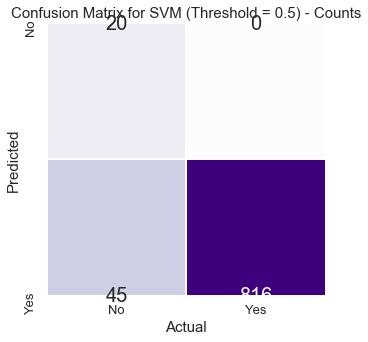

In [26]:
#Building Confusion matrix: SVM

#generate confusion matrix
cm_svm = confusion_matrix(y_test, svm_pred)
#put it into a dataframe
cm_svm_df = pd.DataFrame(cm_svm)

#plot CM
fig, ax = plt.subplots(figsize = (5,5))
sns.heatmap(pd.DataFrame(cm_svm_df.T), annot=True, annot_kws={"size": 20}, cmap="Purples", vmin=0, vmax=150, fmt='.0f', linewidths=1, linecolor="white", cbar=False,
           xticklabels=["No","Yes"], yticklabels=["No","Yes"])
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(["No","Yes"], fontsize=13)
ax.set_yticklabels(["No","Yes"], fontsize=13)
plt.title("Confusion Matrix for SVM (Threshold = 0.5) - Counts", fontsize=15)
plt.show()

In [27]:
#generating a report to extract the measure of interest using built-in sklearn function for svm
report = classification_report(y_test,svm_pred,digits=3,output_dict = True)
#print(report)
print("SVM:")
print("Accuracy = {0:0.3f}".format(report["accuracy"]))
print("Precision = {0:0.3f}".format(report["1.0"]["precision"]))
print("Specificity = {0:0.3f}".format(report["0.0"]["recall"]))
print("Sensitivity = {0:0.3f}".format(report["1.0"]["recall"]))
print("F1-score = {0:0.3f}".format(report["1.0"]["f1-score"]))

SVM:
Accuracy = 0.949
Precision = 0.948
Specificity = 0.308
Sensitivity = 1.000
F1-score = 0.973


SVM has a better sensitivity, accuracy, and F-1 score than Logistic Regression, but very low specificity. Before taking any decision lets move to Decision tree, which might be more appropriate for our data

# Decision Tree Classifier

In [28]:
t0=time.time()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
clf_dt = DecisionTreeClassifier(random_state=0) #logisticRegr
clf_dt.fit(X_train,y_train)
dt_pred = clf_dt.predict(X_test) 
#generate predicted probabilites for test data
dt_pred_prob = clf_dt.predict_proba(X_test)
score = accuracy_score(y_test,dt_pred) 
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)

Accuracy : 0.9863791146424518
Time taken : 0.016952991485595703


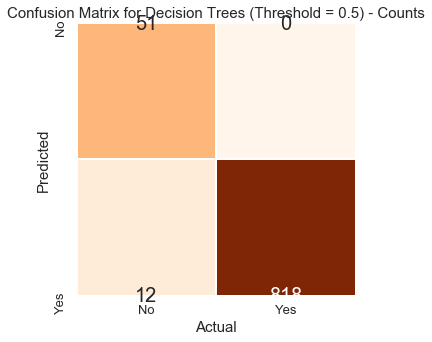

In [29]:
#Building Confusion matrix: Decision Trees

#generate confusion matrix
cm_dt = confusion_matrix(y_test, dt_pred)
#put it into a dataframe
cm_dt_df = pd.DataFrame(cm_dt)

#plot CM
fig, ax = plt.subplots(figsize = (5,5))
sns.heatmap(pd.DataFrame(cm_dt_df.T), annot=True, annot_kws={"size": 20}, cmap="Oranges", vmin=0, vmax=150, fmt='.0f', linewidths=1, linecolor="white", cbar=False,
           xticklabels=["No","Yes"], yticklabels=["No","Yes"])
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(["No","Yes"], fontsize=13)
ax.set_yticklabels(["No","Yes"], fontsize=13)
plt.title("Confusion Matrix for Decision Trees (Threshold = 0.5) - Counts", fontsize=15)
plt.show()

In [30]:
#generating a report to extract the measure of interest using built-in sklearn function for Decision Tree
report = classification_report(y_test,dt_pred,digits=3,output_dict = True)
#print(report)
print("Descision Tree Model:")
print("Accuracy = {0:0.3f}".format(report["accuracy"]))
print("Precision = {0:0.3f}".format(report["1.0"]["precision"]))
print("Specificity = {0:0.3f}".format(report["0.0"]["recall"]))
print("Sensitivity = {0:0.3f}".format(report["1.0"]["recall"]))
print("F1-score = {0:0.3f}".format(report["1.0"]["f1-score"]))

Descision Tree Model:
Accuracy = 0.986
Precision = 0.986
Specificity = 0.810
Sensitivity = 1.000
F1-score = 0.993


### Decision Tree has almost perfect sensitivity with improved accuracy, precision, f1-score and specificity than any other model So we decide to go with this for our validation

# Validation

In [31]:
##Cleaning validation File
dfv = pd.read_csv(r"validation.csv", decimal = ',')
dfv = dfv.drop(columns=['variable18'])
dfv = dfv.dropna()
org_dfv_X = dfv #keeping a backup file for orginal data
dfv = dfv.drop(columns=['variable3', 'variable8','variable10','variable15','variable17','variable19']) 

dfv['classLabel'].replace({'no.': 0, 'yes.': 1},inplace = True)
dfv['variable9'].replace({'f': 0, 't': 1},inplace = True)
dfv['variable12'].replace({'f': 0, 't': 1},inplace = True)


categorical_columns = ['variable1','variable4', 'variable5', 'variable6', 'variable7', 'variable13']
dfv = pd.get_dummies(dfv, columns=categorical_columns)


scaler = preprocessing.MinMaxScaler()
scaler.fit(dfv)
dfv = pd.DataFrame(scaler.transform(dfv), index=dfv.index, columns=dfv.columns)

df2 = df.iloc[0:0]
df2
df3 = pd.concat([df2,dfv], sort = False)

df3 = df3.fillna(0)

#For classification
X_val = df3.loc[:,df3.columns!='classLabel']
y_val = df3[['classLabel']]

## Validation - Decision Trees

In [32]:
val_new_y = clf_dt.predict(X_val)

confusion_matrix(y_val, val_new_y)

array([[84, 15],
       [17, 75]], dtype=int64)

In [33]:
#generating a report to extract the measure of interest using built-in sklearn function for Decision Tree
report = classification_report(y_val,val_new_y,digits=3,output_dict = True)
#print(report)
print("Descision Tree Model:")
print("Accuracy = {0:0.3f}".format(report["accuracy"]))
print("Precision = {0:0.3f}".format(report["1.0"]["precision"]))
print("Specificity = {0:0.3f}".format(report["0.0"]["recall"]))
print("Sensitivity = {0:0.3f}".format(report["1.0"]["recall"]))
print("F1-score = {0:0.3f}".format(report["1.0"]["f1-score"]))

Descision Tree Model:
Accuracy = 0.832
Precision = 0.833
Specificity = 0.848
Sensitivity = 0.815
F1-score = 0.824


## Validation - SVM

In [34]:
val_new_y = clf_svc.predict(X_val)

confusion_matrix(y_val, val_new_y)

array([[37, 62],
       [ 2, 90]], dtype=int64)

## Validation - Logistic Regression

In [35]:
val_new_y = logisticRegr.predict(X_val)

confusion_matrix(y_val, val_new_y)

array([[46, 53],
       [ 3, 89]], dtype=int64)

Again, Decision Tree has been proved as the best method for Classification

However there is a significant drop in overall performance as compared to test data. So lets explore our validation dataset

In [37]:
#Lets see the file
#Input X and y of validation dataset
#X_val = df3.loc[:,df3.columns!='classLabel']
#y_val = df3[['classLabel']]
y_predicted = clf_dt.predict(X_val)

y_predicted_df = pd.DataFrame({'Predicted':y_predicted})
y_predicted_df.replace({0: 'No', 1: 'Yes'},inplace = True)
#y_val.reset_index(drop=True, inplace=True)
org_dfv_X.reset_index(drop=True, inplace=True)
result = pd.concat([org_dfv_X, y_predicted_df], axis=1)
result

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable19,classLabel,Predicted
0,b,32.33,75,u,g,e,bb,1.585,t,f,0,t,s,420.0,0,4200000,1,no.,No
1,b,23.58,179,u,g,c,v,0.540,f,f,0,t,g,136.0,1,1360000,0,no.,No
2,b,36.42,"7,5e-05",y,p,d,v,585.000,f,f,0,f,g,240.0,3,2400000,1,no.,No
3,b,18.42,"10,415",y,p,aa,v,125.000,t,f,0,f,g,120.0,375,1200000,0,no.,No
4,b,24.50,"13,335",y,p,aa,v,0.040,f,f,0,t,g,120.0,475,1200000,1,no.,No
5,a,39.08,4.00E-04,u,g,c,v,3.000,f,f,0,f,g,480.0,0,4800000,0,no.,No
6,b,23.42,1.00E-04,u,g,c,v,0.500,f,f,0,t,s,280.0,0,2800000,1,no.,No
7,b,29.58,475,u,g,m,v,2.000,f,t,1,t,g,460.0,68,4600000,0,no.,No
8,b,27.42,125,u,g,aa,bb,0.250,f,f,0,t,g,720.0,0,7200000,1,no.,No
9,b,58.58,271,u,g,c,v,2.415,f,f,0,t,g,320.0,0,3200000,0,no.,No


This data has significant different patterns in it. With a quick observation, I can highligh few:
1. This data has a nearly half split of  classLabel Yes/No (46:54). In our training dataset, this ratio is 7:93 
2. Varaible19 doesnot exactly respond to classLabel 
3. Variable11 has significantly lower stdev which might indicate that variable10 has many more f

Due to difference in data patterns among both datasets, we may come to our conclusion  that:
1. It was not taken randomnly 
2. or it doesnot belong to the same dataset. (like this date is not of the same year may be)

Since attributes anmes are not given. It is difficult to asses as if which attribute should be remained or removed from the model. 